Generating Data

In [1]:
import torch
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random
import sys
sys.path.append("../")
from  MiniTransformersModels.MiniVit import ClassificationVit

# ==========================================
# OPTION 1: Dataset de formes géométriques
# ==========================================

def generate_geometric_dataset(n_samples=1000, img_size=32, n_classes=5):
    """
    Génère un dataset de formes géométriques colorées
    Classes: 0=Cercle, 1=Carré, 2=Triangle, 3=Rectangle, 4=Losange
    """
    images = []
    labels = []
    
    colors = [
        (255, 100, 100),  # Rouge
        (100, 150, 255),  # Bleu
        (100, 255, 100),  # Vert
        (255, 255, 100),  # Jaune
        (255, 150, 255),  # Rose
    ]
    
    for i in range(n_samples):
        # Choisir une classe
        cls = random.randint(0, n_classes - 1)
        
        # Créer l'image
        img = Image.new("RGB", (img_size, img_size), color=(240, 240, 240))
        draw = ImageDraw.Draw(img)
        
        # Position et taille aléatoires
        margin = 6
        size = random.randint(12, 20)
        x = random.randint(margin, img_size - margin - size)
        y = random.randint(margin, img_size - margin - size)
        color = random.choice(colors)
        
        if cls == 0:  # Cercle
            draw.ellipse([x, y, x+size, y+size], fill=color, outline=(0, 0, 0), width=1)
        elif cls == 1:  # Carré
            draw.rectangle([x, y, x+size, y+size], fill=color, outline=(0, 0, 0), width=1)
        elif cls == 2:  # Triangle
            points = [(x+size//2, y), (x, y+size), (x+size, y+size)]
            draw.polygon(points, fill=color, outline=(0, 0, 0))
        elif cls == 3:  # Rectangle
            draw.rectangle([x, y, x+size, y+size//2], fill=color, outline=(0, 0, 0), width=1)
        elif cls == 4:  # Losange
            points = [(x+size//2, y), (x+size, y+size//2), (x+size//2, y+size), (x, y+size//2)]
            draw.polygon(points, fill=color, outline=(0, 0, 0))
        
        # Convertir en tensor
        arr = torch.tensor(np.array(img), dtype=torch.float32) / 255.0
        images.append(arr)
        labels.append(cls)
    
    return torch.stack(images), torch.tensor(labels, dtype=torch.long)


# ==========================================
# OPTION 2: Dataset de chiffres manuscrits simulés
# ==========================================

def generate_digit_dataset(n_samples=1000, img_size=32, n_classes=10):
    """
    Génère un dataset de chiffres manuscrits simplifiés (0-9)
    """
    images = []
    labels = []
    
    for i in range(n_samples):
        digit = random.randint(0, n_classes - 1)
        
        # Créer l'image
        img = Image.new("RGB", (img_size, img_size), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)
        
        # Position et rotation aléatoires
        offset_x = random.randint(-2, 2)
        offset_y = random.randint(-2, 2)
        
        # Dessiner le chiffre de façon simple
        base_x, base_y = 8 + offset_x, 8 + offset_y
        width = 16
        height = 20
        
        if digit == 0:
            draw.ellipse([base_x, base_y, base_x+width, base_y+height], 
                        outline=(0, 0, 0), width=3)
        elif digit == 1:
            draw.line([base_x+width//2, base_y, base_x+width//2, base_y+height], 
                     fill=(0, 0, 0), width=3)
        elif digit == 2:
            draw.arc([base_x, base_y, base_x+width, base_y+height//2], 0, 180, 
                    fill=(0, 0, 0), width=3)
            draw.line([base_x+width, base_y+height//4, base_x, base_y+height], 
                     fill=(0, 0, 0), width=3)
        elif digit == 3:
            draw.arc([base_x, base_y, base_x+width, base_y+height//2], 0, 180, 
                    fill=(0, 0, 0), width=3)
            draw.arc([base_x, base_y+height//2, base_x+width, base_y+height], 0, 180, 
                    fill=(0, 0, 0), width=3)
        elif digit == 4:
            draw.line([base_x, base_y, base_x, base_y+height//2], 
                     fill=(0, 0, 0), width=3)
            draw.line([base_x, base_y+height//2, base_x+width, base_y+height//2], 
                     fill=(0, 0, 0), width=3)
            draw.line([base_x+width, base_y, base_x+width, base_y+height], 
                     fill=(0, 0, 0), width=3)
        elif digit == 5:
            draw.line([base_x+width, base_y, base_x, base_y], fill=(0, 0, 0), width=3)
            draw.line([base_x, base_y, base_x, base_y+height//2], fill=(0, 0, 0), width=3)
            draw.arc([base_x, base_y+height//2, base_x+width, base_y+height], 0, 180, 
                    fill=(0, 0, 0), width=3)
        elif digit == 6:
            draw.ellipse([base_x, base_y+height//2, base_x+width, base_y+height], 
                        outline=(0, 0, 0), width=3)
            draw.arc([base_x, base_y, base_x+width, base_y+height//2], 90, 270, 
                    fill=(0, 0, 0), width=3)
        elif digit == 7:
            draw.line([base_x, base_y, base_x+width, base_y], fill=(0, 0, 0), width=3)
            draw.line([base_x+width, base_y, base_x, base_y+height], fill=(0, 0, 0), width=3)
        elif digit == 8:
            draw.ellipse([base_x, base_y, base_x+width, base_y+height//2], 
                        outline=(0, 0, 0), width=3)
            draw.ellipse([base_x, base_y+height//2, base_x+width, base_y+height], 
                        outline=(0, 0, 0), width=3)
        elif digit == 9:
            draw.ellipse([base_x, base_y, base_x+width, base_y+height//2], 
                        outline=(0, 0, 0), width=3)
            draw.arc([base_x, base_y+height//2, base_x+width, base_y+height], 270, 90, 
                    fill=(0, 0, 0), width=3)
        
        # Convertir en tensor
        arr = torch.tensor(np.array(img), dtype=torch.float32) / 255.0
        images.append(arr)
        labels.append(digit)
    
    return torch.stack(images), torch.tensor(labels, dtype=torch.long)


# ==========================================
# OPTION 3: Dataset de textures/patterns
# ==========================================

def generate_pattern_dataset(n_samples=1000, img_size=32, n_classes=4):
    """
    Génère un dataset de patterns/textures
    Classes: 0=Lignes horizontales, 1=Lignes verticales, 2=Damier, 3=Points
    """
    images = []
    labels = []
    
    for i in range(n_samples):
        cls = random.randint(0, n_classes - 1)
        
        img = Image.new("RGB", (img_size, img_size), color=(255, 255, 255))
        draw = ImageDraw.Draw(img)
        
        if cls == 0:  # Lignes horizontales
            spacing = random.randint(3, 5)
            for y in range(0, img_size, spacing):
                draw.line([(0, y), (img_size, y)], fill=(0, 0, 0), width=2)
        
        elif cls == 1:  # Lignes verticales
            spacing = random.randint(3, 5)
            for x in range(0, img_size, spacing):
                draw.line([(x, 0), (x, img_size)], fill=(0, 0, 0), width=2)
        
        elif cls == 2:  # Damier
            square_size = random.randint(4, 6)
            for y in range(0, img_size, square_size):
                for x in range(0, img_size, square_size):
                    if (x // square_size + y // square_size) % 2 == 0:
                        draw.rectangle([x, y, x+square_size, y+square_size], 
                                     fill=(0, 0, 0))
        
        elif cls == 3:  # Points
            spacing = random.randint(4, 6)
            radius = 2
            for y in range(spacing//2, img_size, spacing):
                for x in range(spacing//2, img_size, spacing):
                    draw.ellipse([x-radius, y-radius, x+radius, y+radius], 
                               fill=(0, 0, 0))
        
        # Convertir en tensor
        arr = torch.tensor(np.array(img), dtype=torch.float32) / 255.0
        images.append(arr)
        labels.append(cls)
    
    return torch.stack(images), torch.tensor(labels, dtype=torch.long)


# ==========================================
# OPTION 4: Dataset MNIST-like (téléchargement)
# ==========================================

def load_mnist_like_dataset():
    """
    Charge un dataset réel comme MNIST ou Fashion-MNIST
    Nécessite: pip install torchvision
    """
    try:
        from torchvision import datasets, transforms
        
        transform = transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor(),
            transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # Convertir en RGB
        ])
        
        # Télécharger MNIST
        train_dataset = datasets.MNIST(root='./data', train=True, 
                                      download=True, transform=transform)
        test_dataset = datasets.MNIST(root='./data', train=False, 
                                     download=True, transform=transform)
        
        # Convertir en tensors
        x_train = torch.stack([train_dataset[i][0] for i in range(len(train_dataset))])
        y_train = torch.tensor([train_dataset[i][1] for i in range(len(train_dataset))])
        
        x_test = torch.stack([test_dataset[i][0] for i in range(len(test_dataset))])
        y_test = torch.tensor([test_dataset[i][1] for i in range(len(test_dataset))])
        
        # Convertir de (N, C, H, W) à (N, H, W, C)
        x_train = x_train.permute(0, 2, 3, 1)
        x_test = x_test.permute(0, 2, 3, 1)
        
        return x_train, y_train, x_test, y_test
    
    except ImportError:
        print("torchvision n'est pas installé. Utilisez: pip install torchvision")
        return None



Generating Data 1  Geometric forms


In [9]:

# Exemple 1: Formes géométriques (5 classes)
print("=== Option 1: Formes géométriques ===")
x_train_geo, y_train_geo = generate_geometric_dataset(n_samples=1000, img_size=32, n_classes=5)
x_test_geo, y_test_geo = generate_geometric_dataset(n_samples=100, img_size=32, n_classes=5)
print(f"Train: {x_train_geo.shape}, {y_train_geo.shape}")
print(f"Test: {x_test_geo.shape}, {y_test_geo.shape}")


=== Option 1: Formes géométriques ===
Train: torch.Size([1000, 32, 32, 3]), torch.Size([1000])
Test: torch.Size([100, 32, 32, 3]), torch.Size([100])


Training  Data 1

In [10]:
bert=ClassificationVit("adam","Crossentropy",5,64,4,100)
train_losses,val_losses,accs,val_accs=bert.minibatch_SGD_train(10,x_train_geo,torch.eye(5)[y_train_geo],x_test_geo,torch.eye(5)[y_test_geo],batch_size=32,learning_rate=0.001,accuracy=True)

1 | Train Loss: 0.3868 | Val Loss: 0.3627 | Train Acc: 21.27% | Val Acc: 19.00%
2 | Train Loss: 0.3568 | Val Loss: 0.3230 | Train Acc: 17.94% | Val Acc: 17.00%
3 | Train Loss: 0.3248 | Val Loss: 0.3382 | Train Acc: 20.56% | Val Acc: 22.00%
4 | Train Loss: 0.3437 | Val Loss: 0.3401 | Train Acc: 20.87% | Val Acc: 22.00%
5 | Train Loss: 0.3441 | Val Loss: 0.3289 | Train Acc: 20.67% | Val Acc: 22.00%
6 | Train Loss: 0.3300 | Val Loss: 0.3244 | Train Acc: 20.87% | Val Acc: 17.00%
7 | Train Loss: 0.3235 | Val Loss: 0.3266 | Train Acc: 20.56% | Val Acc: 17.00%
8 | Train Loss: 0.3247 | Val Loss: 0.3294 | Train Acc: 20.77% | Val Acc: 19.00%
9 | Train Loss: 0.3268 | Val Loss: 0.3298 | Train Acc: 18.04% | Val Acc: 19.00%
10 | Train Loss: 0.3266 | Val Loss: 0.3310 | Train Acc: 18.04% | Val Acc: 12.00%


ploting results


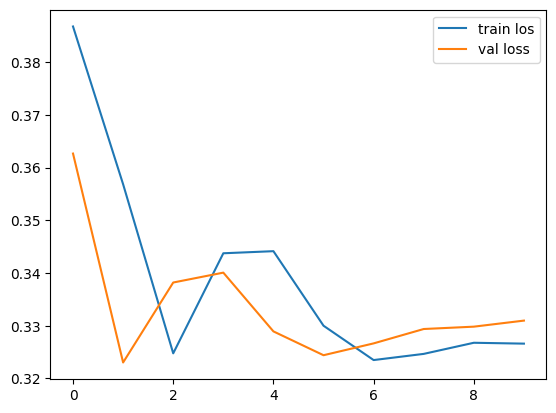

In [11]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)),train_losses,label="train los")
plt.plot(range(len(train_losses)),val_losses,label="val loss")
plt.legend()

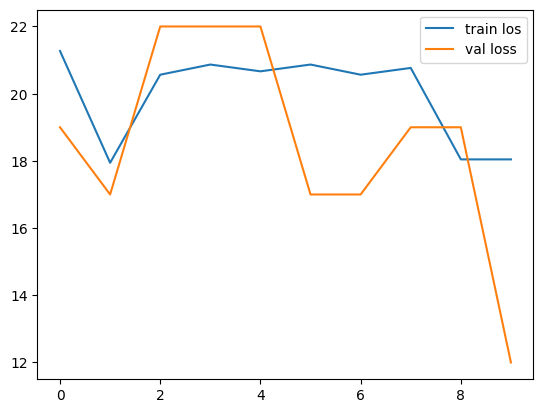

In [12]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_losses)),accs,label="train los")
plt.plot(range(len(train_losses)),val_accs,label="val loss")
plt.legend()

Genearating Data 2 Digits


In [14]:
# Exemple 2: Chiffres (10 classes)
print("\n=== Option 2: Chiffres manuscrits ===")
x_train_digit, y_train_digit = generate_digit_dataset(n_samples=1000, img_size=32, n_classes=10)
x_test_digit, y_test_digit = generate_digit_dataset(n_samples=100, img_size=32, n_classes=10)
print(f"Train: {x_train_digit.shape}, {y_train_digit.shape}")
print(f"Test: {x_test_digit.shape}, {y_test_digit.shape}")


=== Option 2: Chiffres manuscrits ===
Train: torch.Size([1000, 32, 32, 3]), torch.Size([1000])
Test: torch.Size([100, 32, 32, 3]), torch.Size([100])


In [17]:
x_train_digit.unique()

tensor([0., 1.])

Training  on Data 2


In [18]:
bert=ClassificationVit("adam","Crossentropy",10,64,4,2)
train_losses,val_losses,accs,val_accs=bert.minibatch_SGD_train(10,x_train_digit,torch.eye(10)[y_train_digit],x_test_digit,torch.eye(10)[y_test_digit],batch_size=32,learning_rate=0.001,accuracy=True)

1 | Train Loss: 0.3157 | Val Loss: 0.2634 | Train Acc: 10.48% | Val Acc: 6.00%
2 | Train Loss: 0.2588 | Val Loss: 0.2490 | Train Acc: 11.49% | Val Acc: 13.00%
3 | Train Loss: 0.2458 | Val Loss: 0.2430 | Train Acc: 13.21% | Val Acc: 7.00%
4 | Train Loss: 0.2412 | Val Loss: 0.2327 | Train Acc: 11.69% | Val Acc: 17.00%
5 | Train Loss: 0.2345 | Val Loss: 0.2273 | Train Acc: 15.52% | Val Acc: 13.00%
6 | Train Loss: 0.2294 | Val Loss: 0.2275 | Train Acc: 16.53% | Val Acc: 10.00%
7 | Train Loss: 0.2273 | Val Loss: 0.2265 | Train Acc: 13.91% | Val Acc: 14.00%
8 | Train Loss: 0.2244 | Val Loss: 0.2247 | Train Acc: 16.03% | Val Acc: 17.00%
9 | Train Loss: 0.2217 | Val Loss: 0.2216 | Train Acc: 19.15% | Val Acc: 16.00%
10 | Train Loss: 0.2173 | Val Loss: 0.2184 | Train Acc: 18.15% | Val Acc: 21.00%


ploting the results

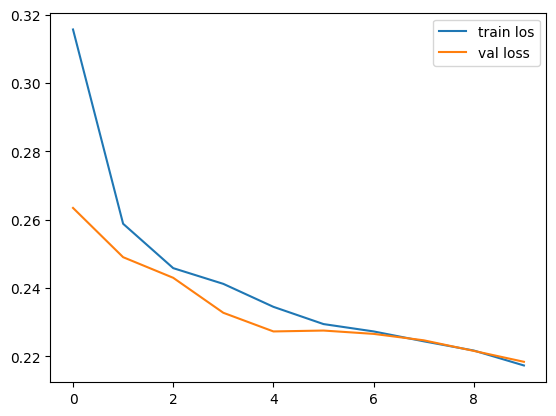

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(10),train_losses,label="train los")
plt.plot(range(10),val_losses,label="val loss")
plt.legend()



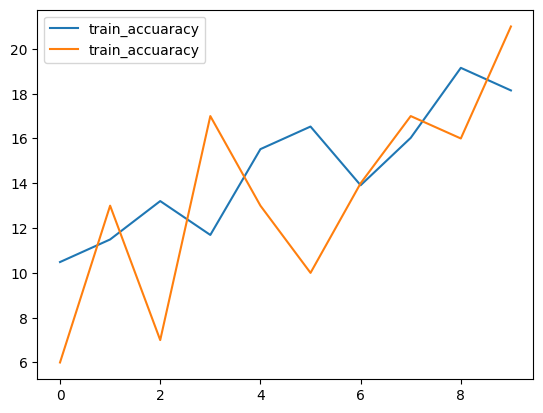

In [21]:
plt.plot(range(10),accs,label="train_accuaracy")
plt.plot(range(10),val_accs,label="train_accuaracy")
plt.legend()

Generating Data 3 Texture Data

In [22]:
print("\n=== Option 3: Patterns/Textures ===")
x_train_pat, y_train_pat = generate_pattern_dataset(n_samples=1000, img_size=32, n_classes=4)
x_test_pat, y_test_pat = generate_pattern_dataset(n_samples=100, img_size=32, n_classes=4)
print(f"Train: {x_train_pat.shape}, {y_train_pat.shape}")
print(f"Test: {x_test_pat.shape}, {y_test_pat.shape}")


=== Option 3: Patterns/Textures ===
Train: torch.Size([1000, 32, 32, 3]), torch.Size([1000])
Test: torch.Size([100, 32, 32, 3]), torch.Size([100])


training on data

In [24]:
bert=ClassificationVit("adam","Crossentropy",10,64,4,100)
train_losses,val_losses,accs,val_accs=bert.minibatch_SGD_train(10,x_train_digit,torch.eye(10)[y_train_digit],x_test_digit,torch.eye(10)[y_test_digit],batch_size=32,learning_rate=0.001,accuracy=True)

1 | Train Loss: 0.4149 | Val Loss: 0.2876 | Train Acc: 8.06% | Val Acc: 11.00%
2 | Train Loss: 0.2915 | Val Loss: 0.2437 | Train Acc: 8.06% | Val Acc: 6.00%
3 | Train Loss: 0.2444 | Val Loss: 0.2416 | Train Acc: 10.38% | Val Acc: 6.00%
4 | Train Loss: 0.2409 | Val Loss: 0.2431 | Train Acc: 10.48% | Val Acc: 13.00%
5 | Train Loss: 0.2418 | Val Loss: 0.2453 | Train Acc: 9.98% | Val Acc: 13.00%
6 | Train Loss: 0.2417 | Val Loss: 0.2461 | Train Acc: 9.98% | Val Acc: 9.00%
7 | Train Loss: 0.2404 | Val Loss: 0.2443 | Train Acc: 11.29% | Val Acc: 5.00%
8 | Train Loss: 0.2378 | Val Loss: 0.2426 | Train Acc: 11.49% | Val Acc: 5.00%
9 | Train Loss: 0.2367 | Val Loss: 0.2429 | Train Acc: 11.39% | Val Acc: 5.00%
10 | Train Loss: 0.2373 | Val Loss: 0.2436 | Train Acc: 11.49% | Val Acc: 11.00%


ploting the results


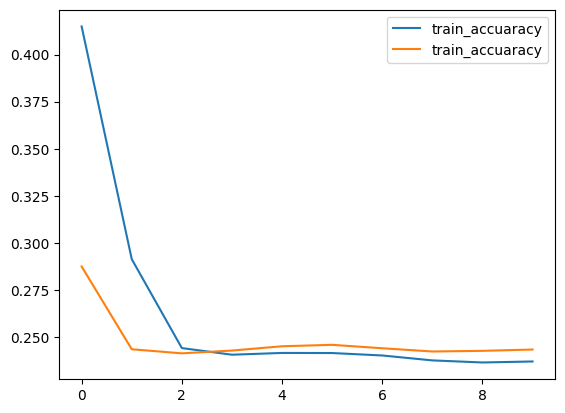

In [25]:
plt.plot(range(10),train_losses,label="train_accuaracy")
plt.plot(range(10),val_losses,label="train_accuaracy")
plt.legend()

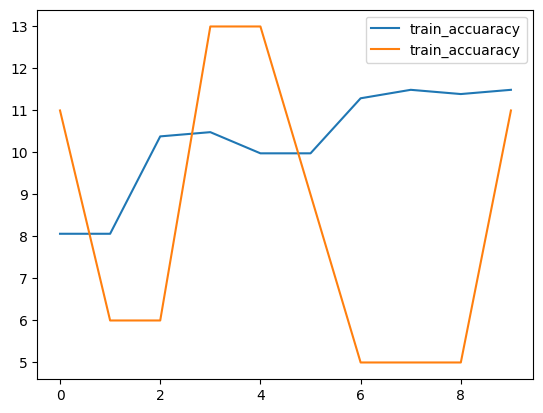

In [26]:
plt.plot(range(10),accs,label="train_accuaracy")
plt.plot(range(10),val_accs,label="train_accuaracy")
plt.legend()